In [3]:
import numpy as np
from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
import os
import galsim
import os
parentdir = os.path.abspath("..")
os.sys.path.insert(0,parentdir) 
import cg_functions as cg_fn
from astropy.table import Table

plt.rc('font', family='sans-serif')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)



# Reference Galaxy

In [9]:
# Plots to be saved at
plot_path = parentdir + '/plots/'

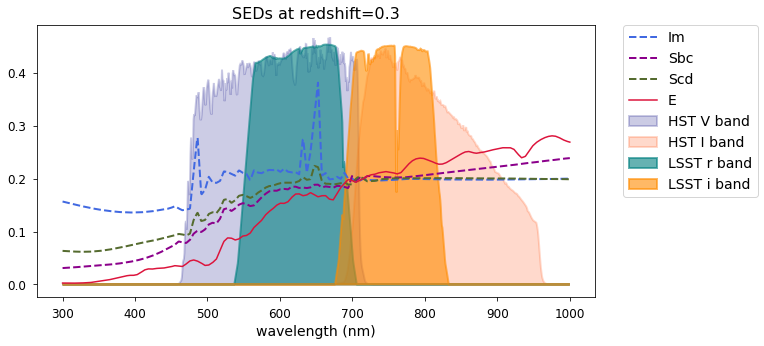

In [4]:
path = '/afs/slac.stanford.edu/u/ki/sowmyak/code/test_CRG/'
disk_SED_names=['Im', 'Sbc', 'Scd']
colors = ['royalblue', 'darkmagenta', 'darkolivegreen', 'c', 'y', 'm']
bulge_SED_name ='E'
z=0.3
x=np.linspace(300,1000,1000)

plt.figure(figsize=[10,5])
V = cg_fn.get_HST_Bandpass('F606W')
I = cg_fn.get_HST_Bandpass('F814W')
r = galsim.Bandpass(path +'data/baseline/total_r.dat',
                        wave_type='nm').thin(rel_err=1e-4)
i = galsim.Bandpass(path + 'data/baseline/total_i.dat',
                        wave_type='nm').thin(rel_err=1e-4)
for num, disk_SED_name in enumerate(disk_SED_names):
    d_SED = galsim.SED(path + "data/CWW_{}_ext.sed".format(disk_SED_name), 
                            wave_type='Ang', flux_type= 'flambda')
    d_SED = d_SED.withFluxDensity(0.2, 550.0).atRedshift(z)
    plt.plot(x,d_SED(x), label=disk_SED_name,linewidth=2,
             c=colors[num], linestyle='--')
b_SED = galsim.SED(path + "data/CWW_{}_ext.sed".format(bulge_SED_name), 
                            wave_type='Ang', flux_type= 'flambda')
b_SED = b_SED.withFluxDensity(0.2, 550.0).atRedshift(z)

plt.plot(x,b_SED(x), c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.1f}'.format(z), size=16)
plt.fill(x,V(x), alpha=0.2, color='navy', label='HST V band', linewidth=2)
plt.fill(x,I(x), alpha=0.2, color='orangered', label='HST I band',linewidth=2)
plt.fill(x,r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "ref_gal_filters.png", 
             bbox_inches='tight')

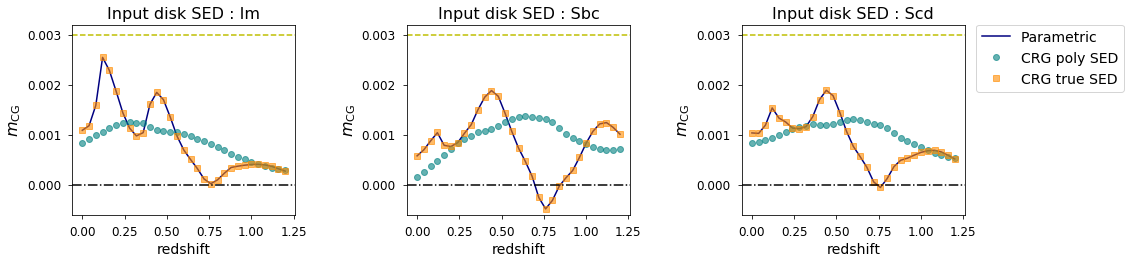

In [3]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat = {}
for dSED in dSEDs :
    path ='/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/ref_gal_results/'
    name = path + 'ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat[dSED] = Table.read(name,format='fits')

plt.figure(1,figsize=[16,14])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)


for i,dSED in enumerate(dSEDs) :
    redshifts = cat[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat[dSED]['para_m1'].T[2],
             '-', label='Parametric', color='navy')
    plt.plot(redshifts, cat[dSED]['CRG_m1'].T[2],
             'o',label='CRG poly SED',color='teal', alpha=0.6)
    plt.plot(redshifts, cat[dSED]['CRG_tru_m1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('redshift', size=14)
    plt.ylabel(r'$m_{\rm CG}$', size=16)
    plt.title("Input disk SED : %s"%dSED, size=16)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "ref_gal_cg.png", 
             bbox_inches='tight')



In [4]:
snr, m, m_std, m_err = np.loadtxt('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/model_cg_err_z_0.4.txt').T
in_snr = np.loadtxt('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/model_cg_err_z_0.4_i_band_snrs.txt')

In [13]:
xp = cat['Im']['redshift']
fp = cat['Im']['CRG_m1'].T[2]
np.interp(0.3,xp,fp)

0.001244251683184434

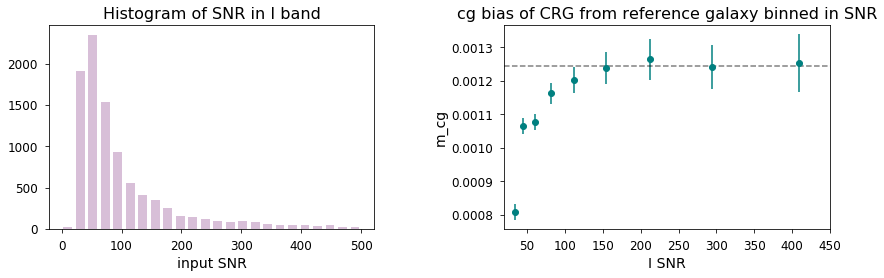

In [18]:
plt.figure(1,figsize=[14,9])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,2,2)
xp = cat['Im']['redshift']
fp = cat['Im']['CRG_m1'].T[2]
val = np.interp(0.3, xp, fp)
plt.axhline(val, linestyle= '--', c='k', alpha=0.5)
plt.errorbar(snr, m,yerr=m_err,color='teal',
                marker='o', linestyle='')
plt.xlabel('I SNR')
plt.ylabel('m_cg')
plt.xlim([20,450])
plt.title('cg bias of CRG from reference galaxy binned in SNR')
plt.subplot(2,2,1)
plt.hist(in_snr,np.linspace(0,500,25),
         color='thistle',histtype='bar',rwidth=0.7)
plt.xlabel('input SNR')
plt.title('Histogram of SNR in I band')
plt.savefig(plot_path + "ref_gal_cg_snr.png", 
             bbox_inches='tight')

# Catsim

cg_bias_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_catsim_cg_bias_only.fits', format='fits')

cg_bias_cat['HST_sn_ellip_gauss'] = cg_bias_cat['HST_sn_ellip_gauss'] *(0.316)**0.5

cg_bias_cat.write('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_catsim_cg_bias_only.fits', format='fits', overwrite=True)

Correlated noise fudgfactor: ratio of variance=0.316 has been added to the HST noise

In [10]:
def get_plt_rng(arr):
    """Get 5th and 95th percentile"""
    return np.percentile(arr,5), np.percentile(arr,95)

In [11]:
cg_bias_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_catsim_cg_bias_only.fits', format='fits')

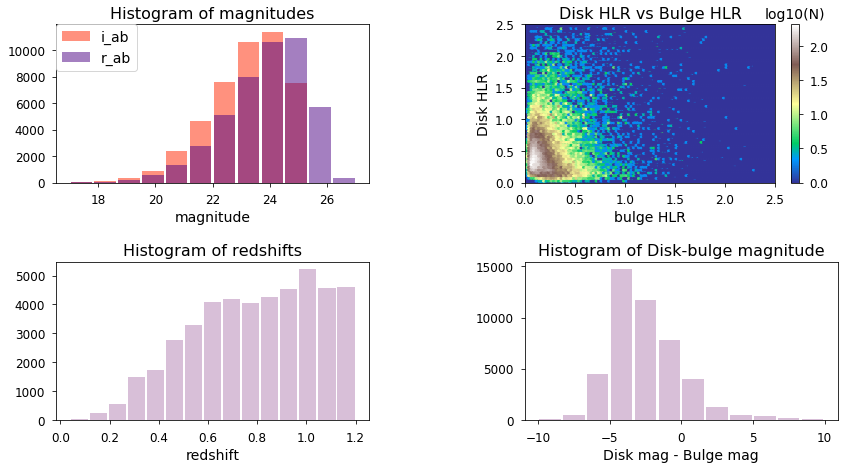

In [22]:
## Plot Catsim galaxy properties 
plt.figure(1,figsize=[14,16])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(4,2,1)
plt.hist(cg_bias_cat['i_ab'],np.linspace(17, 27,13),
         alpha=0.7,rwidth=0.9,
         color='tomato', label='i_ab')
plt.hist(cg_bias_cat['r_ab'],np.linspace(17, 27,13),
         alpha=0.5,rwidth=0.9,
         color='indigo', label='r_ab')
plt.xlabel('magnitude', size=14)
plt.legend(loc=2)
plt.title('Histogram of magnitudes', size=16)

plt.subplot(4,2,2)
x = cg_bias_cat['BulgeHalfLightRadius']
y = cg_bias_cat['DiskHalfLightRadius']
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(0,2.5,0,2.5), cmap='terrain')
plt.xlim([0,2.5])
plt.ylim([0,2.5])
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('bulge HLR', size=14)
plt.ylabel('Disk HLR', size=14)
plt.title('Disk HLR vs Bulge HLR', size=16)

plt.subplot(4,2,3)
plt.hist(cg_bias_cat['redshift_1'], 15,
         alpha=1,rwidth=0.9,
         color='thistle')
plt.xlabel('redshift', size=14)
plt.title('Histogram of redshifts', size=16)

plt.subplot(4,2,4)
plt.hist(cg_bias_cat['magnorm_disk']-cg_bias_cat['magnorm_bulge'], np.linspace(-10,10,13),
         alpha=1,rwidth=0.9,
         color='thistle')
plt.title('Histogram of Disk-bulge magnitude', size=16)
plt.xlabel('Disk mag - Bulge mag', size=14)
plt.savefig(plot_path + "cat_gal.png", 
             bbox_inches='tight')

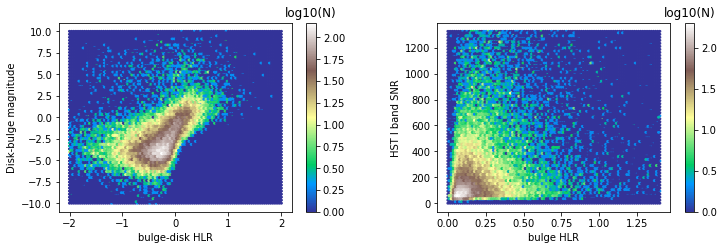

In [53]:
plt.figure(1,figsize=[12,8])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(2,2,1)
x = cg_bias_cat['BulgeHalfLightRadius']-cg_bias_cat['DiskHalfLightRadius']
y = cg_bias_cat['magnorm_disk']-cg_bias_cat['magnorm_bulge']
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(-2,2,-10,10), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('bulge-disk HLR')
plt.ylabel('Disk-bulge magnitude')

plt.subplot(2,2,2)
x = cg_bias_cat['BulgeHalfLightRadius']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(0,1.4,0,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('bulge HLR')
plt.ylabel('HST I band SNR')

# Results of cg analysis on catsim galaxies

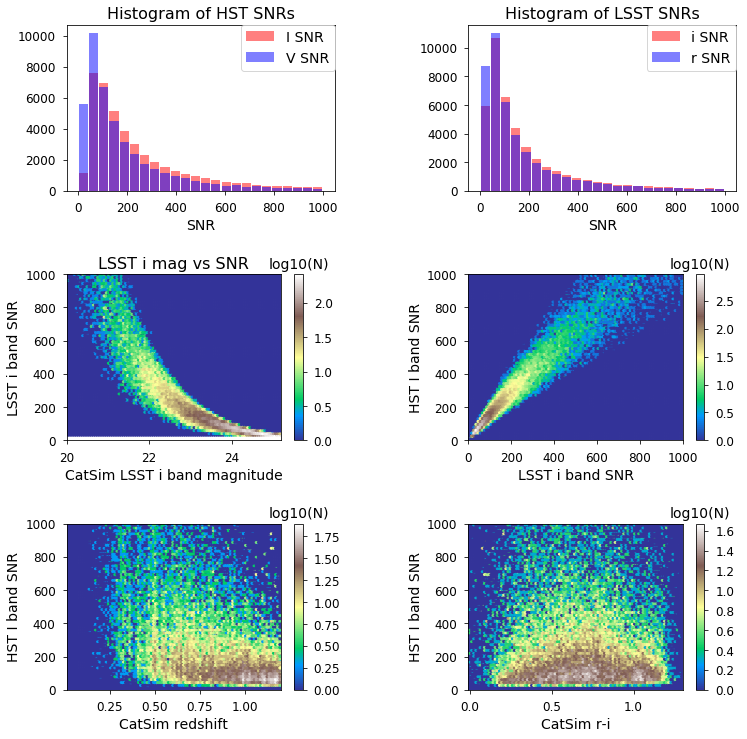

In [23]:
## Plot Catsim galaxy properties 
sn_max=1000
plt.figure(1,figsize=[12, 26])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(6,2,1)
plt.hist(cg_bias_cat['HST_sn_ellip_gauss'].T[1],np.linspace(0,sn_max,25), alpha=0.5,
         color='r',rwidth=0.9, label='I SNR')
plt.hist(cg_bias_cat['HST_sn_ellip_gauss'].T[0],np.linspace(0,sn_max,25), alpha=0.5,
         color='b',rwidth=0.9, label='V SNR')
plt.xlabel('SNR', size=14)
plt.legend(loc=1)
plt.title('Histogram of HST SNRs', size=16)

plt.subplot(6,2,2)
plt.hist(cg_bias_cat['LSST_sn_ellip_gauss'].T[1],np.linspace(0,sn_max,25), alpha=0.5,
         color='r',rwidth=0.9, label='i SNR')
plt.hist(cg_bias_cat['LSST_sn_ellip_gauss'].T[0],np.linspace(0,sn_max,25), alpha=0.5,
         color='b',rwidth=0.9, label='r SNR')
plt.xlabel('SNR', size=14)
plt.legend(loc=0)
plt.title('Histogram of LSST SNRs', size=16)

plt.subplot(6,2,3)
x = cg_bias_cat['i_ab']
y = cg_bias_cat['LSST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(int(xmin),25.2,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlim([20,25.2])
plt.ylim([0, 1000])
plt.xlabel('CatSim LSST i band magnitude', size=14)
plt.ylabel('LSST i band SNR', size=14)
plt.title('LSST i mag vs SNR', size=16)

plt.subplot(6,2,4)
x = cg_bias_cat['LSST_sn_ellip_gauss'].T[1]
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log', extent=(0,1000, 0, 1000),
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)

plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel('LSST i band SNR', size=14)
plt.ylabel('HST I band SNR', size=14)

plt.subplot(6,2,5)
x = cg_bias_cat['redshift_1']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y, extent=(0.01,1.2, 0, 1000) ,bins='log',
            cmap='terrain')
clb = plt.colorbar()
plt.xlim([0.01, 1.2])
plt.ylim([0, 1000])
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('CatSim redshift', size=14)
plt.ylabel('HST I band SNR', size=14)

plt.subplot(6,2,6)
x =  cg_bias_cat['r_ab']- cg_bias_cat['i_ab']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y, extent=(-0.01,1.3, 0, 1000) ,bins='log',
            cmap='terrain')
plt.ylim([0, 1000])
plt.xlim([-.01,1.3])
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('CatSim r-i', size=14)
plt.ylabel('HST I band SNR', size=14)


plt.savefig(plot_path + "cat_gal_snr.png", 
             bbox_inches='tight')

m_parametric = 2.68618201559e-05 +- 2.76814373529e-06
m_CRG = -0.00166002898473 +- 0.000500576566409


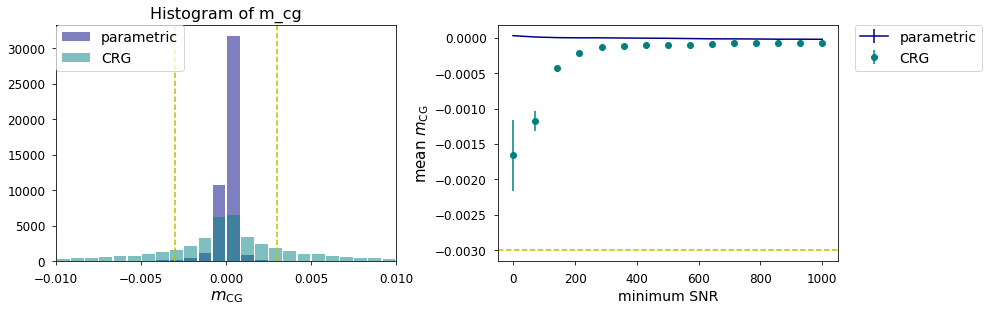

In [26]:
plt.figure(1,figsize=[14,10])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(2,2,1)
plt.hist(cg_bias_cat['m_para1'].T[2], np.linspace(-0.01,0.01,25),
         alpha=0.5, rwidth=0.9,
         color='navy', label='parametric')
plt.hist(cg_bias_cat['m_CRG1'].T[2],np.linspace(-0.01,0.01,25),
         alpha=0.5, rwidth=0.9,
         color='teal', label='CRG')
plt.locator_params(axis ='x', tight=True, nbins=7)
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$', size=16)
plt.legend(loc=2)
plt.title('Histogram of m_cg', size=16)

plt.subplot(2,2,2)
snrs = np.linspace(0, 1000,15)
mean_m_para, mean_m_CRG = [],[]
mean_m_para_err, mean_m_CRG_err = [],[]
for s in snrs:
    q,= np.where(cg_bias_cat['HST_sn_ellip_gauss'].T[1]>s)
    p = cg_bias_cat['m_para1'][q].T[2]
    c = cg_bias_cat['m_CRG1'][q].T[2]
    mean_m_para.append(np.mean(p))
    mean_m_CRG.append(np.mean(c))
    mean_m_para_err.append(np.std(p)/len(q)**0.5)
    mean_m_CRG_err.append(np.std(c)/len(q)**0.5)
    
plt.errorbar(snrs, mean_m_para, yerr=mean_m_para_err,
             c='navy', label='parametric')
plt.errorbar(snrs, mean_m_CRG, yerr=mean_m_CRG_err,
             c='teal', marker='o', linestyle='', label='CRG')
plt.axhline(-0.003, linestyle='--', c='y')
plt.xlabel('minimum SNR', size=14)
plt.ylabel(r'mean $m_{\rm CG}$', size=15)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.savefig(plot_path + "cat_mcg_results.png", 
             bbox_inches='tight')
mean = np.mean(cg_bias_cat['m_para1'].T[2])
err = np.std(cg_bias_cat['m_para1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print "m_parametric = {0} +- {1}".format(mean, err)
mean = np.mean(cg_bias_cat['m_CRG1'].T[2])
err = np.std(cg_bias_cat['m_CRG1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print "m_CRG = {0} +- {1}".format(mean, err)

Results for galaxy with SNR >100


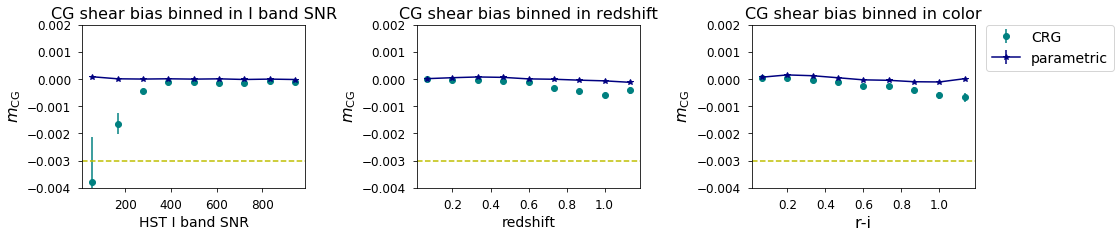

In [12]:
print "Results for galaxy with SNR >100"
plt.figure(1,figsize=[16,12])

i=2
plt.subplot(3,3,1)
in_bins = np.linspace(0, 1000,10)
d = np.digitize(cg_bias_cat['HST_sn_ellip_gauss'].T[1], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='')
y = [cg_bias_cat['m_para1'].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-')
plt.ylim([-0.004,0.002])
plt.axhline(-0.003, linestyle='--', c='y')
plt.locator_params(axis='y',tight=True, nbins=6)
plt.xlabel('HST I band SNR', size=14)
plt.ylabel(r'$m_{\rm CG}$', size=16)
plt.title('CG shear bias binned in I band SNR', size=16)

q, = np.where(cg_bias_cat['HST_sn_ellip_gauss'].T[1]>200)
plt.subplot(3,3,2)
in_bins = np.linspace(0, 1.2,10)
d = np.digitize(cg_bias_cat['redshift_1'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='')
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-')
plt.ylim([-0.004,0.002])
plt.axhline(-0.003, linestyle='--', c='y')
plt.locator_params(axis='y',tight=True, nbins=6)
plt.xlabel('redshift', size=14)
plt.ylabel(r'$m_{\rm CG}$', size=16)
plt.title('CG shear bias binned in redshift', size=16)

plt.subplot(3,3,3)
in_bins = np.linspace(0, 1.2,10)
x_in = cg_bias_cat['r_ab'][q]- cg_bias_cat['i_ab'][q]
d = np.digitize(x_in, in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='', label='CRG')
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-', label='parametric')
plt.ylim([-0.004,0.002])
plt.axhline(-0.003, linestyle='--', c='y')
plt.locator_params(axis='y',tight=True, nbins=6)
plt.xlabel('r-i', size=16)
plt.ylabel(r'$m_{\rm CG}$', size=16)
plt.title('CG shear bias binned in color' , size=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "cat_mcg_bin.png", 
             bbox_inches='tight')

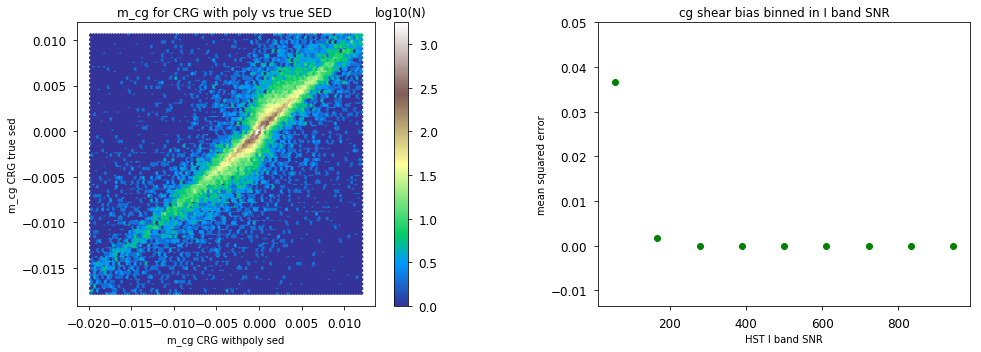

In [110]:


plt.figure(1,figsize=[16,12])
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace = 0.4)

i=2
plt.subplot(2,2,1)
x = cg_bias_cat['m_CRG_tru1'].T[i] 
y = cg_bias_cat['m_CRG1'].T[i]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.scatter(x,y, c='teal',
#             marker='o')
plt.xlabel('m_cg CRG withpoly sed')
plt.ylabel('m_cg CRG true sed')
plt.title('m_cg for CRG with poly vs true SED ')
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')

plt.subplot(2,2,2)
i=2
in_bins = np.linspace(0, 1000,10)
d = np.digitize(cg_bias_cat['HST_sn_ellip_gauss'].T[1], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y1 = (cg_bias_cat['m_CRG1'].T[i]-cg_bias_cat['m_para1'].T[i])**2
y = [y1[d == j].mean() for j in range(1,len(in_bins))]
plt.scatter(x[:-1],y,c='g',
             marker='o',)
plt.xlabel('HST I band SNR')
plt.ylabel('mean squared error')
plt.title('cg shear bias binned in I band SNR')

# Error on CRG

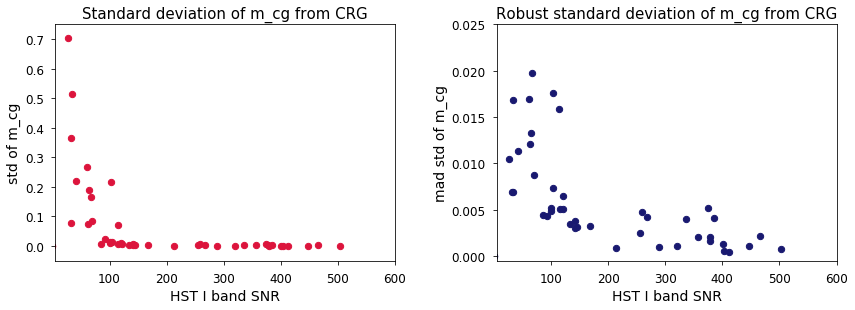

In [28]:
snr, m, m_std, m_err, m_madstd = np.loadtxt('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/catsim_cg_err_same_num.txt',).T

plt.figure(1,figsize=[14,10])
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace = 0.3)

plt.subplot(2,2,1)
plt.scatter(snr, m_std, color='crimson', s=40)
plt.xlabel('HST I band SNR',size=14)
plt.ylabel('std of m_cg',size=14)
plt.title('Standard deviation of m_cg from CRG',size=15)
plt.xlim([5,600])
plt.ylim([-0.05,0.75])
plt.subplot(2,2,2)
plt.scatter(snr, m_madstd, color='midnightblue', s=40)
plt.xlabel('HST I band SNR',size=14)
plt.ylabel('mad std of m_cg',size=14)
plt.title('Robust standard deviation of m_cg from CRG',size=15)
plt.xlim([5,600])
plt.ylim([-0.0005,0.025])
plt.savefig(plot_path + "cat_mcg_err.png", 
             bbox_inches='tight')

## I band with noise

In [4]:
comb_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/catsim_cg_bias_multi_band.fits', format='fits')

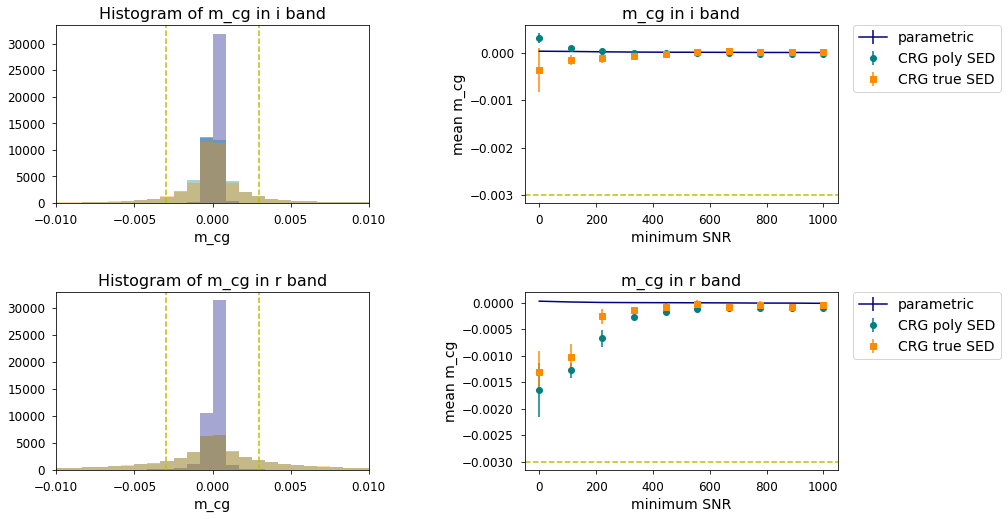

In [7]:
snrs = np.linspace(0, 1000,10)
plt.figure(1,figsize=[14,18])
plt.subplot(4,2,1)
plt.hist(comb_cat['m_para1_i'].T[2], np.linspace(-0.01,0.01,25), alpha=0.35,
         color='navy', label='parametric')
plt.hist(comb_cat['m_CRG1_i'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='teal', label='CRG poly SED')
plt.hist(comb_cat['m_CRG_tru1_i'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='Darkorange', label='CRG true SED')
plt.xlim([-0.01,0.01])
plt.xlabel('m_cg')
plt.title('Histogram of m_cg in i band')
plt.locator_params(tight=True, nbins=6, axis='x')
# plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')

plt.subplot(4,2,2)
mean_m_para_i, mean_m_CRG1_i, mean_m_CRG2_i = [],[],[]
mean_m_para_err_i, mean_m_CRG1_err_i, mean_m_CRG2_err_i = [],[],[]
for s in snrs:
    q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>s)
    p = comb_cat['m_para1_i'][q].T[2]
    c1 = comb_cat['m_CRG1_i'][q].T[2]
    c2 = comb_cat['m_CRG_tru1_i'][q].T[2]
    mean_m_para_i.append(np.mean(p))
    mean_m_CRG1_i.append(np.mean(c1))
    mean_m_CRG2_i.append(np.mean(c2))
    mean_m_para_err_i.append(np.std(p)/len(q)**0.5)
    mean_m_CRG1_err_i.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG2_err_i.append(np.std(c2)/len(q)**0.5)
    
plt.errorbar(snrs, mean_m_para_i, yerr=mean_m_para_err_i, label='parametric', c='navy')
plt.errorbar(snrs, mean_m_CRG1_i, yerr=mean_m_CRG1_err_i, marker='o',linestyle='',
             c='teal', label='CRG poly SED')
plt.errorbar(snrs, mean_m_CRG2_i, yerr=mean_m_CRG2_err_i, marker='s',linestyle='',
             c='Darkorange', label='CRG true SED')
plt.xlabel('minimum SNR')
plt.ylabel('mean m_cg')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title('m_cg in i band')
#plt.axhline(0.003, linestyle='--', c='y')
plt.axhline(-0.003, linestyle='--', c='y')


plt.subplot(4,2,3)
plt.hist(comb_cat['m_para1'].T[2], np.linspace(-0.01,0.01,25), alpha=0.35,
         color='navy', label='parametric')

plt.hist(comb_cat['m_CRG1'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='teal', label='CRG poly SED')

plt.hist(comb_cat['m_CRG2'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='Darkorange', label='CRG true SED')
plt.xlim([-0.01,0.01])
plt.xlabel('m_cg')
plt.title('Histogram of m_cg in r band')
plt.locator_params(tight=True, nbins=6, axis='x')
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
# plt.legend(bbox_to_anchor=(1.05,1), loc=2)

plt.subplot(4,2,4)
mean_m_para_r, mean_m_CRG1_r, mean_m_CRG2_r = [],[],[]
mean_m_para_err_r, mean_m_CRG1_err_r, mean_m_CRG2_err_r = [],[],[]
for s in snrs:
    q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>s)
    p = comb_cat['m_para1'][q].T[2]
    c1 = comb_cat['m_CRG1'][q].T[2]
    c2 = comb_cat['m_CRG_tru1'][q].T[2]
    mean_m_para_r.append(np.mean(p))
    mean_m_CRG1_r.append(np.mean(c1))
    mean_m_CRG2_r.append(np.mean(c2))
    mean_m_para_err_r.append(np.std(p)/len(q)**0.5)
    mean_m_CRG1_err_r.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG2_err_r.append(np.std(c2)/len(q)**0.5)
    
plt.errorbar(snrs, mean_m_para_r, yerr=mean_m_para_err_r, label='parametric',c='navy')
plt.errorbar(snrs, mean_m_CRG1_r, yerr=mean_m_CRG1_err_r, c='teal',marker='o',
             linestyle='', label='CRG poly SED')
plt.errorbar(snrs, mean_m_CRG2_r, yerr=mean_m_CRG2_err_r, c='Darkorange',marker='s',
             linestyle='' ,label='CRG true SED')
plt.xlabel('minimum SNR')
plt.ylabel('mean m_cg')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title('m_cg in r band')
#plt.axhline(0.003, linestyle='--', c='y')
plt.axhline(-0.003, linestyle='--', c='y')

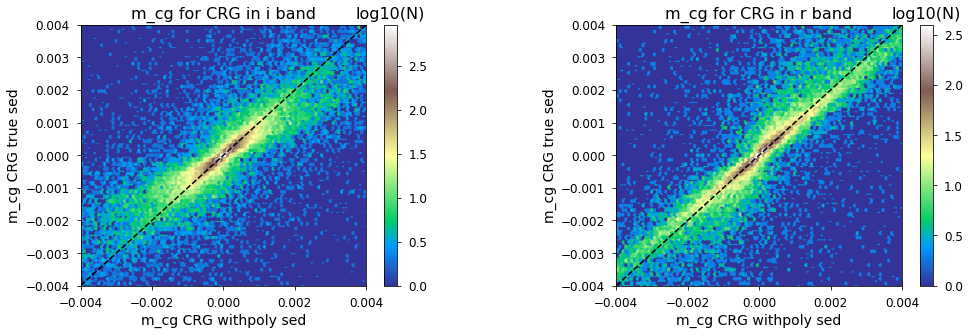

In [53]:
plt.figure(figsize=[16,12])

q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>0)
xmin, xmax = -0.004,0.004
ymin, ymax = -0.004,0.004
i=2
plt.subplot(2,2,1)
x = comb_cat['m_CRG_tru1_i'].T[i][q] 
y = comb_cat['m_CRG1_i'].T[i][q]
#xmin, xmax = get_plt_rng(x)
#ymin, ymax = get_plt_rng(y)
#plt.scatter(x,y, c='teal',
#             marker='o')
plt.xlabel('m_cg CRG withpoly sed')
plt.ylabel('m_cg CRG true sed')
plt.title('m_cg for CRG in i band')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.plot([xmin, xmax], [xmin, xmax], c='k', linestyle='--')

plt.subplot(2,2,2)
x = comb_cat['m_CRG_tru1'].T[i][q] 
y = comb_cat['m_CRG1'].T[i][q]
#xmin, xmax = get_plt_rng(x)
#ymin, ymax = get_plt_rng(y)
#plt.scatter(x,y, c='teal',
#             marker='o')
plt.xlabel('m_cg CRG withpoly sed')
plt.ylabel('m_cg CRG true sed')
plt.title('m_cg for CRG in r band')
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
plt.plot([xmin, xmax], [xmin, xmax], c='k', linestyle='--')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
clb = plt.colorbar()
clb.ax.set_title('log10(N)')

(-0.01, 0.01)

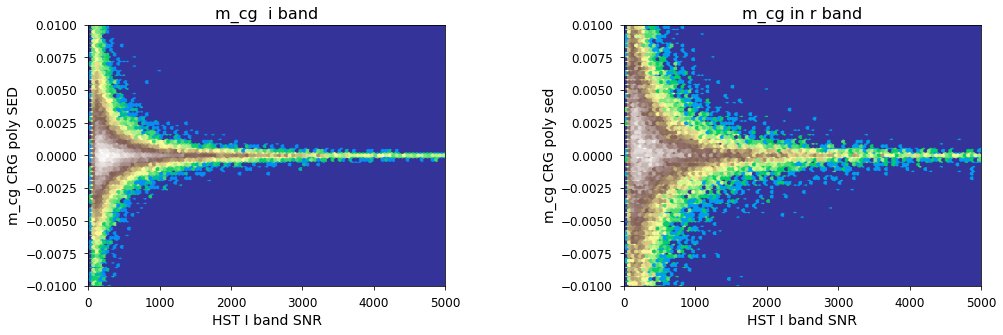

In [51]:
plt.figure(figsize=[16,12])

q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>0)
xmin, xmax = 0,5000
ymin, ymax = -0.01,0.01
i=2
plt.subplot(2,2,1)
x = comb_cat['HST_sn_ellip_gauss_2'].T[1][q] 
y = comb_cat['m_CRG1_i'].T[i][q]
#xmin, xmax = get_plt_rng(x)
#ymin, ymax = get_plt_rng(y)
#plt.scatter(x,y, c='teal',
#             marker='o')
plt.xlabel('HST I band SNR')
plt.ylabel('m_cg CRG poly SED')
plt.title('m_cg  i band')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')

plt.subplot(2,2,2)
x = comb_cat['HST_sn_ellip_gauss_2'].T[1][q] 
y = comb_cat['m_CRG1'].T[i][q]
#xmin, xmax = get_plt_rng(x)
#ymin, ymax = get_plt_rng(y)
#plt.scatter(x,y, c='teal',
#             marker='o')
plt.xlabel('HST I band SNR')
plt.ylabel('m_cg CRG poly sed')
plt.title('m_cg in r band')
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
